# Analyze Hotel Reviews

Target:
+ Estimate Review Score

# Import Libiaries

In [1]:
# Data handling libaries
import pandas as pd
import numpy as np
# Data visualization libaries
import matplotlib.pyplot as plt
import seaborn as sns
# Machine learning libaries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report, precision_recall_curve

# Preprocces Data

In [2]:
df = pd.read_csv('../data/Hotel_Reviews_NLP.csv')
df.loc[0]

Hotel_Name                                                    South Place Hotel
Hotel_Address                                            London, United Kingdom
Total_Number_of_Reviews                                                     326
Average_Score                                                               9.3
Reviewer_Score                                                              2.5
Negative_Sentiment                                                      -0.9849
Positive_Sentiment                                                       -0.982
Reviewer_Nationality                                                    Brazil 
Leisure_trip                                                                  0
Couple                                                                        1
Solo_traveler                                                                 0
Business_trip                                                                 0
Group                                   

In [3]:
df_small = df.sample(n=10000)

In [4]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,Total_Number_of_Reviews,Average_Score,Reviewer_Score,Negative_Sentiment,Positive_Sentiment,Leisure_trip,Couple,Solo_traveler,Business_trip,Group,Family_with_young_children,Family_with_older_children,With_a_pet
Total_Number_of_Reviews,1.000000,-0.197610,-0.073719,-0.025142,-0.061738,-0.001213,0.012291,-0.000836,-0.002364,0.001630,-0.014347,-0.007810,-0.016911
Average_Score,-0.197610,1.000000,0.370255,0.058922,0.180128,0.086419,0.095871,-0.081323,-0.075395,-0.025241,-0.017486,-0.002777,-0.001073
Reviewer_Score,-0.073719,0.370255,1.000000,0.135018,0.409337,0.117538,0.070042,-0.083834,-0.112883,0.013512,-0.020535,0.005610,0.000055
Negative_Sentiment,-0.025142,0.058922,0.135018,1.000000,0.103351,0.027504,0.006419,-0.013864,-0.027199,0.003728,0.003687,-0.000026,-0.001417
Positive_Sentiment,-0.061738,0.180128,0.409337,0.103351,1.000000,0.097886,0.057787,-0.061865,-0.089085,0.003599,-0.021530,0.009408,-0.002748
Leisure_trip,-0.001213,0.086419,0.117538,0.027504,0.097886,1.000000,0.275378,-0.509119,-0.904034,0.054212,0.108427,0.075271,-0.003047
Couple,0.012291,0.095871,0.070042,0.006419,0.057787,0.275378,1.000000,-0.505259,-0.278220,-0.379871,-0.358471,-0.227072,0.003921
Solo_traveler,-0.000836,-0.081323,-0.083834,-0.013864,-0.061865,-0.509119,-0.505259,1.000000,0.528578,-0.200416,-0.189125,-0.119801,-0.007912
Business_trip,-0.002364,-0.075395,-0.112883,-0.027199,-0.089085,-0.904034,-0.278220,0.528578,1.000000,-0.053208,-0.123421,-0.084388,-0.003539
Group,0.001630,-0.025241,0.013512,0.003728,0.003599,0.054212,-0.379871,-0.200416,-0.053208,1.000000,-0.142191,-0.090070,-0.004740


/home/user/.local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/home/user/.local/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


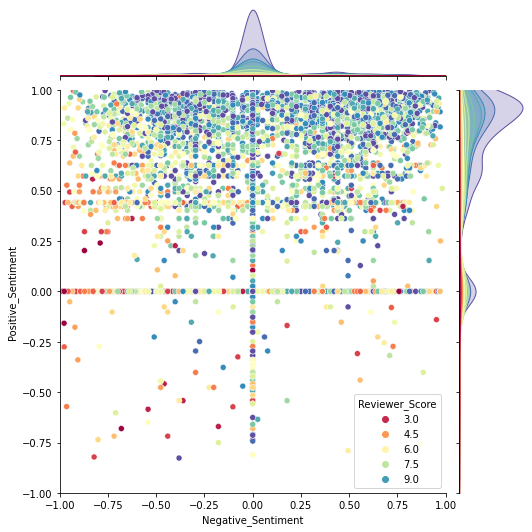

In [5]:
sns.jointplot(data=df_small,
              x="Negative_Sentiment", y="Positive_Sentiment", hue="Reviewer_Score",
              palette=sns.color_palette("Spectral", as_cmap=True),
              xlim=(-1, 1), ylim=(-1, 1),
              height=7.5
)

# Model

In [6]:
df.columns

Index(['Hotel_Name', 'Hotel_Address', 'Total_Number_of_Reviews',
       'Average_Score', 'Reviewer_Score', 'Negative_Sentiment',
       'Positive_Sentiment', 'Reviewer_Nationality', 'Leisure_trip', 'Couple',
       'Solo_traveler', 'Business_trip', 'Group', 'Family_with_young_children',
       'Family_with_older_children', 'With_a_pet', 'Negative_Review',
       'Positive_Review'],
      dtype='object')

In [7]:
# define encoder and Scaler
le = LabelEncoder()
scaler = StandardScaler()
# define X and Y
X = df[['Negative_Sentiment', 'Positive_Sentiment', 'Leisure_trip', 'Couple', 'Solo_traveler', 'Business_trip', 'Group', 'Family_with_young_children', 'Family_with_older_children', 'With_a_pet']]
y = df['Reviewer_Score']
# encode Labels
# y['Reviewer_Score'] = le.fit_transform(y['Reviewer_Score'])  # comment out if not needed
# Scale
X = scaler.fit_transform(X)

In [8]:
y = y.astype('int')
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [9]:
model = SGDClassifier(verbose=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


-- Epoch 1
Norm: 0.29, NNZs: 10, Bias: -1.609138, T: 361016, Avg. loss: 0.038018
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 0.14, NNZs: 10, Bias: -1.240161, T: 722032, Avg. loss: 0.017102
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 0.08, NNZs: 10, Bias: -1.122130, T: 1083048, Avg. loss: 0.016072
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 0.07, NNZs: 10, Bias: -1.082384, T: 1444064, Avg. loss: 0.015669
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 0.06, NNZs: 10, Bias: -1.080592, T: 1805080, Avg. loss: 0.015445
Total training time: 0.27 seconds.
-- Epoch 6
Norm: 0.04, NNZs: 10, Bias: -1.090148, T: 2166096, Avg. loss: 0.015310
Total training time: 0.34 seconds.
-- Epoch 7
Norm: 0.04, NNZs: 10, Bias: -1.055717, T: 2527112, Avg. loss: 0.015217
Total training time: 0.40 seconds.
-- Epoch 8
Norm: 0.04, NNZs: 10, Bias: -1.063320, T: 2888128, Avg. loss: 0.015144
Total training time: 0.45 seconds.
Convergence after 8 epochs took 0.45 seconds
-- Epoch 1
Norm: 0.20

[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:    5.3s finished


In [12]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           2       0.16      0.07      0.10      1136
           3       0.67      0.00      0.00      2081
           4       0.17      0.03      0.06      3418
           5       0.10      0.13      0.12      9124
           6       0.00      0.00      0.00     10286
           7       0.12      0.00      0.00     28011
           8       0.15      0.08      0.10     26535
           9       0.29      0.47      0.36     39383
          10       0.22      0.41      0.29     34748

    accuracy                           0.23    154722
   macro avg       0.21      0.13      0.11    154722
weighted avg       0.19      0.23      0.18    154722



/home/user/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/user/.local/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
